<a href="https://colab.research.google.com/github/jhermosillo/diplomado_CDD2019/blob/master/04%20Clasificacion_Agrupamiento/1%20Modelos%20Lineales/Notebooks/Funciones_Discriminantes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1 style="font-size:50px;" align="left"> <img align="left" width="350" src="./img/classification-in-machine-learning.jpg"/> <br>Modelos <br>Lineales de Clasificación</h1>

___

<style>
table, td, th {  
  border: 1px solid #ddd;
  text-align: left;
}
|  <img src="../img/data_science.jpg" width="300"/> |   <font color='midnightblue'>Diplomado en <br> Ciencia de Datos <br> con Python</font>|
|:-:|:-|


&#128214; <u>Referencias bibliográficas</u>:
* Bishop, Christopher M. (2006). Pattern recognition and machine learning. New York. Springer.
* Flach, Peter (2012). Machine Learning: The Art and Science of Algorithms that Make Sense of Data. Cambridge University Press.

# &#9991; <u> La tarea de clasificación</u>

* Supongamos que tenemos un vector de datos de entrada $\textrm{x}$ de dimensión $D$: $\textrm{x}:=\{x_1,\ldots,x_D\}$ ($\textrm{x}\in\mathbb{R}^D$), junto con una variable objetivo correspondiente $\textrm{t}$.

&#9758; Un clasificador separa los datos de entrada en **regiones de decisión** cuyos límites llamamos **Fronteras (o superficies) de Decisión** (FD).

* Las fronteras lineales son funciones lineales del vector de entrada, por lo que están definidas en **hyperplanos** de dimensión $D-1$. 
* En la Regresión: $\textrm{t}$ es un valor real.
* En la __Clasificación__: $\textrm{t}$ es una variable que corresponde a una clase $\mathcal{C}_k$, con $k=1,2,\ldots,K$. Típicamente, en el caso de $K=2$, $t\in\{0,1\}$, de tal forma que $t=0$ corresponde a $\mathcal{C}_1$ y $t=1$ corresponde a $\mathcal{C}_2$. La representación binaria permite tener una interpretación probabilística de la pertenencia a una clase u a otra (regresión logística).
* En el caso multiclase, $t$ puede ser un vector de representación de tipo **codificación 1-en-**$K$. Por ejemplo, si $K=5$, la clase $\mathcal{C}_2$ se representaría así:
$$
t=(0,1,0,0,0)^\textrm{T}
$$

___

# &#9991; <u>Notación</u>

* La Regresión Lineal clásica, vista en el Módulo anterior, busca ajustar un modelo lineal:
$$
y=\beta_0+\beta_1x_1+\beta_2x_2+\ldots+\beta_nx_n,
$$
* Para fines del presente Módulo, vamos a expresar un modelo lineal de la siguiente forma:
$$
y(\textrm{x})=\textrm{w}^\textrm{T}\textrm{x}+w_{0} \;\;\;\;\;\;\;\;(1)
$$
donde usaremos la convención clásica de notación vectorial:
<table style="width:100%">
  <tr>
    <td><img align="left" width="350" src="./img/vectores.jpg"/></td>
    <td><img align="left" width="350" src="./img/vectores_dot.jpg"/></td>
  </tr>
</table>
    
En Python, lo anterior se escribe:

In [3]:
#Para Colab
# from IPython.display import Javascript, Math
# def display_Math(s):
#   display(Javascript("var sc = document.createElement('script')"))
#   display(Javascript("sc.type='text/javascript'; sc.src='https://cdnjs.cloudflare.com/ajax/libs/mathjax/2.7.3/MathJax.js?config=TeX-AMS-MML_HTMLorMML&dummy=.js'"))
#   display(Javascript("var currentDiv = document.activeElement.parent"))
#   #display(Javascript("sc.onload = function () {console.log('loaded')};"))
#   display(Javascript("document.body.insertBefore(sc, currentDiv)"))
#   return display(Math(s))

In [1]:
import numpy as np
from IPython.display import display, Markdown, Latex

w=(np.ones(10)*2)
x=np.arange(1,11)
print('w ({0}) = {1} \n x ({2}) = {3}'.format(w.shape,w,x.shape,x))

p=np.multiply(w,x)
y1=np.sum(p)
y2=np.dot(w,x)
y3=w@x
wT=w.T
y4=wT@x


s1 = f'$y_1 = %s = \sum w^T \odot x = \sum %s %s = %.2f$'%('np.sum(np.multiply(w,x))',p,p.shape,y1) 
s2 = f'$y_2 = %s = y_3 = %s = w \cdot x = %.2f = %.2f$'%('np.dot(w,x)','w@x',y2,y3) 
s3 = f'$y_4 = %s = w^T \cdot x = %s %s \cdot %s = %.2f$'%('w.T@x',wT,wT.shape,x,y4) 

#Para Jupyter
display(Latex(s1))
display(Latex(s2))
display(Latex(s3))
#Para Colab
# display_Math(s1)
# display_Math(s2)
# display_Math(s3)

w ((10,)) = [2. 2. 2. 2. 2. 2. 2. 2. 2. 2.] 
 x ((10,)) = [ 1  2  3  4  5  6  7  8  9 10]


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

* En el caso de la clasificación, queremos predecir etiquetas discretas de clase, o más generalmente valores de probabilidad de pertenencia a las clases en el rango $(0,1)$.
* Para esto vamos a considerar una transformación no lineal $f(\cdot)$ de $\textrm{w}$:

$$
y(\textrm{x})=f(\textrm{w}^\textrm{T}\textrm{x}+w_{0}) \;\;\;\;\;\;\;\;\;\;(2)
$$
* A $f(\cdot)$ se le conoce como **función de activación**.
* Las FD corresponden con $y(\textrm{x})=$ constante, es decir $\textrm{w}^\textrm{T}\textrm{x}+w_{0}=$ constante, lo que significa que las FD son funciones lineales de $\textrm{x}$, a pesar de que $f(\cdot)$ es no lineal.
* Por esta razón a la clase de modelos descritos por (2) se le conoce como _**modelos lineales generalizados**_.
* Sin embargo, a diferencia de los modelos de regresión (1), que son lineales en los parámetros, los modelos (2) no lo son debido a $f(\cdot)$.
* Los modelos lineales de clasificación también pueden aplicarse si hacemos una transformación fija de los datos primero mediante funciones base que llamaremos aquí $\phi(x)$. 

# &#9991; <u>Funciones discriminantes</u>

## Discriminantes de 2 clases

* La función discriminante más simple es la que obtenemos mediante una función lineal del vector de entrada:

$$
y(\textrm{x})=\textrm{w}^\textrm{T}\textrm{x}+w_{0} \;\;\;\;\;\;\;\;\;\;(3)
$$

* $\textrm{w}$ es el **vector de pesos**, y $w_0$ es el bias (sesgo / intercepto). 
* A $-w_0$ se le conoce como el **umbral** (_threshold_).
* Un vector de entrada $\textrm{x}$ será asignado a la clase $\mathcal{C}_{1}$ si $y(\textrm{x}) \geq 0$ y a la clase $\mathcal{C}_{2}$ de lo contrario.
* La FD correspondiente está definida por la relación $y(\textrm{x}) = 0$, que corresponde a un hyperplano de dimensión $(D-1)$ dentro del espacio $D-$ dimensional de entrada.
* Para cualesquiera dos puntos $\textrm{x}_A$ y $\textrm{x}_B$, $y(\textrm{x}_A) = y(\textrm{x}_B) = 0$, por lo que $\textrm{w}^\textrm{T}(\textrm{x}_A-\textrm{x}_B)=0$ es ortogonal a cualquier vector en la FD. 
* De esta forma, $\textrm{w}$ **determina la orientación de la FD**. 
* También, si $\textrm{x}$ es un punto en la FD, $y(\textrm{x})=0$ y la distancia normal del origen a la FD está dada por:

$$
\frac{\textrm{w}^\textrm{T}\textrm{x}}{\left\lVert\textrm{w}\right\rVert}=-\frac{w_0}{\left\lVert\textrm{w}\right\rVert}
$$

<div align="center">
<img align="center" width="50%" src="./img/modelo_lineal_conceptos.jpg"/>
</div>

* En muchas ocasiones es conveniente usar una notación más compacta, por lo que escribiremos: $\tilde{\textrm{w}}=(w_0,\textrm{w})$ y $\tilde{\textrm{x}}=(1,\textrm{x})$, por lo que:

$$
y(\textrm{x})=\tilde{\textrm{w}}^\textrm{T}\tilde{\textrm{x}}
$$

* En este caso, la FD son hyperplanos que pasan por el origen del espacio $(D+1)-$ dimensional expandido de la entrada.

## En Python

---Beta----
Beta= [ 6.  -1.2]
Beta.shape = (2,)

---X-----
X[:2]= 
     x0           x1
[[1.         0.        ]
 [1.         0.05050505]]
X.shape=(100, 2), X.ndim=2, X.size=200

---y-----


<IPython.core.display.Latex object>

[6.   5.94 5.88 5.82 5.76 5.7  5.64 5.58 5.52 5.45]
y.shape= (100,)

ax.plot(X[:,1], y, color=,lw=1)


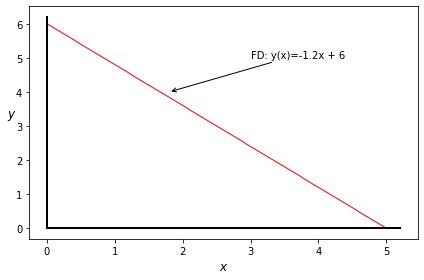

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

print('---Beta----')
b = 6; a = -1.2
Beta=np.array([b,a])
print('Beta=',Beta)
print('Beta.shape = {}\n'.format(Beta.shape))

print('---X-----')
x=np.linspace(0, 5, 100)
X = np.asarray([np.ones(x.size), x]).T
print('X[:2]= ')
print('     x0           x1')
print(X[:2])
print('X.shape={0}, X.ndim={1}, X.size={2}\n'.format(X.shape,X.ndim,X.size))

print('---y-----')
y=np.round(X@Beta,2)

#Para Colab
# display_Math(f'$y(x) = X@Beta = $')

#Para Jupyter
display(Latex(f'$y(x) = X@B = $'))
print(y[:10])
print('y.shape= {}\n'.format(y.shape))


""" DIBUJA TODO """

fig = plt.figure()
ax = fig.add_subplot(111)

ax.plot(X[:,1], y, color='r',lw=1)
print('ax.plot(X[:,1], y, color='r',lw=1)')

#--------Dibuja los ejes y la cuadrícula---------
ax.plot((0,0),(6.2,0), color='k',lw=2)
ax.plot((0,5.2),(0,0), color='k',lw=2)
# ax.grid(color='lightgray', linestyle='--', linewidth=1)

#-------Etiqueta los ejes y coloca el Texto------
plt.xlabel('$x$',size='large')
plt.ylabel('$y$',size='large',rotation=0)
ax.annotate('FD: y(x)=-1.2x + 6', xy=(1.8, 4), xytext=(3, 5),
            arrowprops=dict(arrowstyle = "->"))

#-----Acomoda todo en forma óptima---
fig.tight_layout()

<table style="width:100%">
  <tr>
    <td><img align="left" width="100%" src="./img/Python_DOT_PROD_1.jpg"/></td>
    <td><img align="left" width="100%" src="./img/Python_DOT_PROD_2.jpg"/></td>
  </tr>
</table>

------- W como vector director de la FD --------------
X:=
   x1          x2
[[0.         6.        ]
 [0.05050505 5.94      ]] 

X.shape= (100, 2)

W_r:= [ 6.  -1.2]

ax.plot(X[:,0],X[:,1],color=,alpha=0.5)


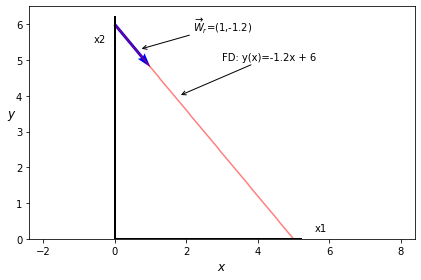

In [3]:
print('------- W como vector director de la FD --------------')
X=np.array(list(zip(x,y)))
print('X:=')
print('   x1          x2')
print(X[:2],'\n')
print('X.shape= {}\n'.format(X.shape))

#------Construye el vector director de la recta--------
b = 6; a = -1.2
W_r=np.array([b,a])
print('W_r:= {}\n'.format(W_r))


""" GRAFICA TODO """

fig = plt.figure()
ax = fig.add_subplot(111)

#-----Dibuja el vector director de la recta------
ax.quiver(0,b,1.0,a, color=['b'], units='xy', scale = 1)

#----Dibuja los puntos de X FD-------------------
# ax.scatter(X[:,0],X[:,1],marker='o',s=20,alpha=0.3)
ax.plot(X[:,0],X[:,1],color='r',alpha=0.5)
print('ax.plot(X[:,0],X[:,1],color='r',alpha=0.5)')
#----Para que los vectores se vean a escala real----
plt.axis('equal')

#--------Dibuja los ejes y la cuadrícula---------
ax.plot((0,0),(6.2,0), color='k',lw=2)
ax.plot((0,5.2),(0,0), color='k',lw=2)
# ax.grid(color='lightgray', linestyle='--', linewidth=1)

#-------Etiqueta los ejes y coloca el Texto------
plt.xlabel('$x$',size='large')
plt.ylabel('$y$',size='large',rotation=0)
ax.annotate('$\overrightarrow W_r$=(1,-1.2)', xy=(0.7, 5.3), xytext=(2.2, 5.8),
            arrowprops=dict(arrowstyle = "->"))

ax.annotate('x1', xy=(5.5, 0), xytext=(5.6, 0.2))
ax.annotate('x2', xy=(-0.5, 5.5), xytext=(-0.6, 5.5))
ax.annotate('FD: y(x)=-1.2x + 6', xy=(1.8, 4), xytext=(3, 5),
            arrowprops=dict(arrowstyle = "->"))

ax.set_xlim(xmin=0, xmax=6)
ax.set_ylim(ymin=0, ymax=6.5)

#-------Oculta el marco------
# plt.axis('off')
#-----Acomoda todo en forma óptima---
fig.tight_layout()


In [4]:
print('------- W como vector ORTOGONAL a la FD --------------')

#---empaca los vectores x,y uno a uno para formar X------ 
X=np.array(list(zip(x,y)))

#---Apila horizontalmente con X un vector de 1's--------
X=np.hstack((np.ones((X.shape[0],1)),X))
print('X:=')
print('       x0          x1          x2')
print(X[:2])
print('X.shape= {}\n'.format(X.shape))


#----------W ortogonal a la FD--------------------
W = np.array([-6,1.2,1.0])
o = [0],[0] # origin point
print('------- W=(w0,w1,w2) --------------')
print('  w0   w1   w2')
print('W= {}'.format(W))
print('\nW_r:= {}\n'.format('[1 -1.2]'))

------- W como vector ORTOGONAL a la FD --------------
X:=
       x0          x1          x2
[[1.         0.         6.        ]
 [1.         0.05050505 5.94      ]]
X.shape= (100, 3)

------- W=(w0,w1,w2) --------------
  w0   w1   w2
W= [-6.   1.2  1. ]

W_r:= [1 -1.2]



<img align="center" width="350" src="./img/modelo_lineal_conceptos.jpg"/>

&#9998; **Calcula el valor de $d$ y $y$**

In [5]:
"""
CALCULA d= -w0/||w||
"""
# usa numpy.linalg.norm(array) --> LA.norm(a)
from numpy import linalg as LA

d=-W[0]/LA.norm(W[1:])
print('d= {}'.format(d))

"""
CALCULA y= W^T@X
"""
y=X@W
print(np.round(y,2))

d= 3.8411063979868794
[ 0.  0.  0.  0.  0.  0.  0.  0.  0. -0. -0. -0. -0. -0. -0. -0. -0.  0.
  0.  0.  0.  0.  0.  0.  0. -0. -0. -0. -0. -0. -0. -0. -0.  0.  0.  0.
  0.  0.  0.  0.  0.  0. -0. -0. -0. -0. -0. -0. -0. -0.  0.  0.  0.  0.
  0.  0.  0.  0. -0. -0. -0. -0. -0. -0. -0. -0.  0.  0.  0.  0.  0.  0.
  0.  0.  0. -0. -0. -0. -0. -0. -0. -0. -0.  0.  0.  0.  0.  0.  0.  0.
  0. -0. -0. -0. -0. -0. -0. -0. -0.  0.]


### Grafiquemos todo

------- W como vector ORTOGONAL a la FD --------------
X:=
[[1.         0.         6.        ]
 [1.         0.05050505 5.94      ]]
W:=
[-6.   1.2  1. ]


<IPython.core.display.Latex object>

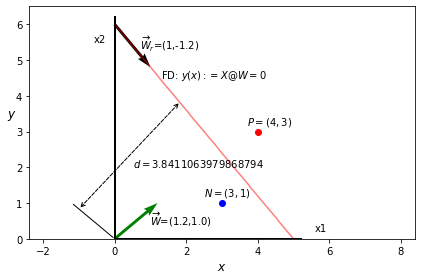

In [6]:
print('------- W como vector ORTOGONAL a la FD --------------')
print('X:=')
print(X[:2])
print('W:=')
print(W)
#Colab
# display_Math(r'$d=\frac{-w_0}{\lVert w \rVert}= %.2f$'%d)
display(Latex(r'$d=\frac{-w_0}{\lVert w \rVert}= %.2f$'%d))

#---------Dibuja todo-----------------------------------------
fig = plt.figure()
ax = fig.add_subplot(111)

#--------W_r ----------------------
b = 6; a = -1.2
W_r=np.array([b,a])

ax.plot(X[:,1],X[:,2],color='r',alpha=0.5)
ax.quiver(0,b,1.0,a, color=['k'], units='xy', scale = 1)
ax.quiver(*o,W[1],W[2], color=['g'], units='xy', scale = 1)


""" FORMATO DE FIGURA"""
#----Para que los vectores se vean a escala real----
plt.axis('equal')

#--------Dibuja los ejes de d---------
plt.annotate('', xy=(0,0), xytext=(-1.2,1),arrowprops=dict(arrowstyle='-'))
plt.annotate('', xy=(-1,0.833333), xytext=(1.83333,3.83333), arrowprops=dict(arrowstyle='<->',linestyle='--'))

#-------Coloca los textos------------
ax.text(0.5,2, '$d= $' + str(d))
ax.text(0.7, 5.3,'$\overrightarrow W_r$=(1,-1.2)')
ax.text(1, 0.4,'$\overrightarrow W$=(1.2,1.0)')
ax.text(1.3,4.5,'FD: $y(x):=X@W=0$')

#----Dibuja dos nuevos puntos------
ax.plot(4,3,'ro')
ax.plot(3,1,'bo')
ax.text(3.7,3.2,'$P=(4,3)$')
ax.text(2.5,1.2,'$N=(3,1)$')

#--------Dibuja los ejes y la cuadrícula---------
ax.plot((0,0),(6.2,0), color='k',lw=2)
ax.plot((0,5.2),(0,0), color='k',lw=2)
# ax.grid(color='lightgray', linestyle='--', linewidth=1)

#-------Etiqueta los ejes, dibujalos y coloca sus etiquetas------
plt.xlabel('$x$',size='large')
plt.ylabel('$y$',size='large',rotation=0)

ax.annotate('x1', xy=(5.5, 0), xytext=(5.6, 0.2))
ax.annotate('x2', xy=(-0.5, 5.5), xytext=(-0.6, 5.5))

ax.set_xlim(xmin=0, xmax=6)
ax.set_ylim(ymin=0, ymax=6.5)

#-------Oculta el marco------
# plt.axis('off')
#-----Acomoda todo en forma óptima---
fig.tight_layout()

&#9998; **Calcula el valor de $y_P$ y $y_N$**

In [7]:
xp=np.array([1, 4,3])
xn=np.array([1, 3,1])

yp=xp@W
yn=xn@W

print('yp={}, yn={}'.format(yp,yn))

yp=1.7999999999999998, yn=-1.4000000000000004


### Discriminantes de $K$ clases

* La extensión a $K>2$ discriminantes tiene sus variantes.
* Dos de las técnicas clásicas son $uno-contra-los-demas$, donde cada clasificador se encarga de separar los datos de una clase particular $C_k$ del resto, y el esquema $uno-contra-uno$, donde tienes $K(K-1)/2$ discriminantes binarios y los puntos se clasifican por mayoría de votos entre los discriminantes.
* Sin embargo estos esquemas presentan inconvenientes como se ilustra en la siguiente figura

<div align="center">
<img align="center" width="60%" src="./img/K_discriminantes.jpg"/>
</div>

* Podemos evitar estos problemas si consideramos un solo discriminante de $K$-clases que abarque $K$ funciones lineales de la forma:

$$
y_k(\textrm{x})=\textrm{w}^\textrm{T}_k\textrm{x}+w_{k0}
$$
&emsp;&ensp; y luego asignar un punto $\textrm{x}$ a la clase $\mathcal{C}_k$ si $y_k(\textrm{x})>y_j(\textrm{x})$ para toda $j\neq k$. 
* La FD entre las clases $\mathcal{C}_k$ y $\mathcal{C}_j$ está entonces dada por $y_k(\textrm{x})=y_j(\textrm{x})$ a por tanto corresponde a un hyperplano de dimensión $(D-1)$ definido por:

$$
(\textrm{w}_k - \textrm{w}_j)^\textrm{T}\textrm{x}+(w_{k0}-w_{j0})=0
$$
* Esto tiene la misma forma que la FD que vimos para el caso de 2 clases, por propiedades análogas a las que vimos aplican.

<div align="center">
<img align="center" width="30%" src="./img/R_convexas.jpg"/>
</div>

# &#9991; <u>Mínimos Cuadrados para clasificación</u>

* Como hemos visto en el Módulo anterior, Mínimos Cuadrados (OLS) aproxima la esperanza condicional $\mathbb{E}[\mathbf{t}|\textrm{x}]$  de los valores objetivo dado el vector de entrada.
* Esto permite suponer que podemos usar OLS como una herramienta de clasificación.
* Cada clase $\mathcal{C}_k$ se describe por su propio modelo lineal:

$$
y_k(\textrm{x})=\textrm{w}^\textrm{T}_k\textrm{x}+w_{k0}\;\;\;\;\;(4)
$$
&emsp;&ensp;&nbsp; donde $k=1,\ldots,K$. Podemos agrupar los términos (4) para escribir usando notación vectorial:

$$
\mathbf{y}(\textrm{x})=\mathbf{\tilde{W}}^\textrm{T} \tilde{\textrm{x}}\;\;\;\;\;(5)
$$

<div align="center">
<img align="center" width="30%" src="./img/y_vectorizado.jpg"/>
</div>

* Para encontrar $\mathbf{\tilde{W}}$ podemos minimizar la suma de los residuales al cuadrado como se hizo en el Módulo anterior.
* Consideremos un conjunto de entrenamiento $\{\textrm{x}_n,\textrm{t}_n\}$, donde $n=1,\ldots,N$, y definamos la matrices $T$ y $X$ de la siguiente forma: 

<div align="center">
<img align="center" width="50%" src="./img/TX.jpg"/>
</div

* Como hemos visto, la solución para $\mathbf{\tilde{W}}$ está dada por:
$$
\mathbf{\tilde{W}}=(\mathbf{\tilde{X}}^\textrm{T}\mathbf{\tilde{X}})^{-1}\mathbf{\tilde{X}}^{\textrm{T}}\mathbf{T}=\mathbf{\tilde{X}}^\dagger\mathbf{T}\;\;\;\;\;(6)
$$
* La función discriminante es entonces:
$$
\textrm{y}(\textrm{x})=\mathbf{\tilde{W}}^\textrm{T}\tilde{\textrm{x}}=\mathbf{T}^\textrm{T}\left( \mathbf{\tilde{X}}^\dagger\right)^\textrm{T}\tilde{\textrm{x}}\;\;\;\;\;(7)
$$

## En Python

In [8]:
def genera_datos(add_outliers=False, add_class=False):
    x0 = np.random.normal(size=50).reshape(-1, 2) - 1
    x1 = np.random.normal(size=50).reshape(-1, 2) + 1.
    if add_outliers:
        x_1 = np.random.normal(size=10).reshape(-1, 2) + np.array([5., 10.])
        return np.concatenate([x0, x1, x_1]), np.concatenate([np.zeros(25), np.ones(30)]).astype(np.int)
    if add_class:
        x2 = np.random.normal(size=50).reshape(-1, 2) + 3.
        return np.concatenate([x0, x1, x2]), np.concatenate([np.zeros(25), np.ones(25), 2 + np.zeros(25)]).astype(np.int)
    return np.concatenate([x0, x1]), np.concatenate([np.zeros(25), np.ones(25)]).astype(np.int)

x_train:=
[[-0.56217613 -0.12330818]
 [-2.36783811  0.05144135]] [[0.80323651 2.30234738]
 [0.8948595  0.83511158]] (50, 2)
y_train:=
[0 0] [1 1] (50,)


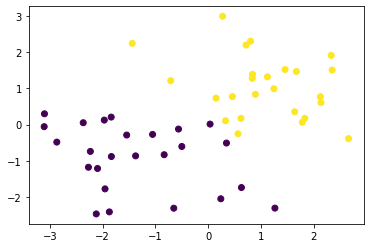

In [9]:
x_train, y_train = genera_datos()
print('x_train:=')
print(x_train[:2],x_train[-2:],x_train.shape)
print('y_train:=')
print(y_train[:2],y_train[-2:],y_train.shape)

#---------Dibuja todo-----------------------------------------
fig = plt.figure()
ax = fig.add_subplot(111)

ax.scatter(x_train[:, 0], x_train[:, 1], c=y_train)

x1_test.shape=  (100, 100)
x_test.shape=  (10000, 2)


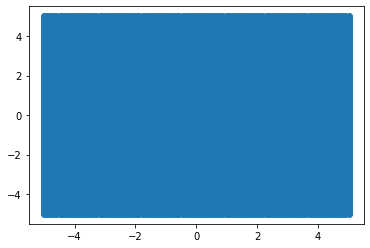

In [10]:
x1_test, x2_test = np.meshgrid(np.linspace(-5, 5, 100), np.linspace(-5, 5, 100))
x_test = np.array([x1_test, x2_test]).reshape(2, -1).T

print('x1_test.shape= ',x1_test.shape)
print('x_test.shape= ',x_test.shape)

fig = plt.figure()
ax = fig.add_subplot(111)

ax.scatter(x_test[:, 0], x_test[:, 1])

&#9998; **Calcula:** $\mathbf{\tilde{W}}=(\mathbf{\tilde{X}}^\textrm{T}\mathbf{\tilde{X}})^{-1}\mathbf{\tilde{X}}^{\textrm{T}}\mathbf{T}=\mathbf{\tilde{X}}^\dagger\mathbf{T}$.

1. Calculamos $\tilde{\mathbf{X}} \in \mathbb{R}^{N\times (D+1)}$.
2. Calculamos $\mathbf{T} \in \mathbb{R}^{N\times K}$.
3. Calculamos $\mathbf{\tilde{W}} \in \mathbb{R}^{(D+1)\times K}$, donde $\mathbf{\tilde{X}}^\dagger \in \mathbb{R}^{(D+1)\times N}$.

$\tilde{\mathbf{X}} \in \mathbb{R}^{N\times (D+1)}:$

In [11]:
from sklearn import preprocessing

features = preprocessing.PolynomialFeatures(1)
X_train=features.fit_transform(x_train)
X_test=features.fit_transform(x_test)

print('X_train:=')
print(X_train[:2])
print('X-train.shape=',X_train.shape)

print('X_test:=')
print(X_test[:2],X_test.shape)


X_train:=
[[ 1.         -0.56217613 -0.12330818]
 [ 1.         -2.36783811  0.05144135]]
X-train.shape= (50, 3)
X_test:=
[[ 1.        -5.        -5.       ]
 [ 1.        -4.8989899 -5.       ]] (10000, 3)


$\mathbf{T}  \in \mathbb{R}^{N\times K}:$

In [12]:
def encoderT(y:np.ndarray):
    K=np.max(y) + 1
    enc=np.eye(K)
    return enc[y]

T=encoderT(y_train)

print('T.shape= {}'.format(T.shape))

T.shape= (50, 2)


&#9998; **Calcula** $\mathbf{\tilde{W}} \in \mathbb{R}^{(D+1)\times K}$; utiliza [numpy.linalg.pinv()](https://numpy.org/doc/stable/reference/generated/numpy.linalg.pinv.html?highlight=linalg%20inv#numpy.linalg.pinv) para calcular $\mathbf{\tilde{X}}^\dagger$:

In [13]:
"""----TU CODIGO AQUÍ---------"""
W=np.linalg.pinv(X_train)@T
"""----------------------------"""

print('W:=')
print(W)
print('\nW.shape={}'.format(W.shape))

W:=
[[ 0.49279682  0.50720318]
 [-0.16463666  0.16463666]
 [-0.20185157  0.20185157]]

W.shape=(3, 2)


&#9998; **Calcula** $\mathbf{y}(\textrm{x})=\mathbf{\tilde{W}}^\textrm{T} \tilde{\textrm{x}}$, $(\mathbf{y}\in\mathbb{R}^{K})$; utiliza [numpy.argmax()](https://numpy.org/doc/stable/reference/generated/numpy.argmax.html?highlight=argmax#numpy.argmax) para obtener $\mathbf{y}$

In [14]:
y_x=X_test@W
# print(y_x,y_x.shape)
y=np.argmax(y_x,axis=1)
print(y,y.shape)

[0 0 0 ... 1 1 1] (10000,)


&#9998; **Escribe una clase LeastSquaresClassifier con lo que acabamos de realizar.**

In [15]:
class LeastSquaresClassifier():
    def __init__(self, W:np.ndarray=None):
        self.W = W

    def fit(self, X:np.ndarray, y:np.ndarray):
        """----TU CODIGO AQUÍ---------"""
        def encoderT(y:np.ndarray):
            K=np.max(y) + 1
            enc=np.eye(K)
            return enc[y]
        T=encoderT(y)
        self.W=np.linalg.pinv(X)@T
        
    def clasifica(self, X:np.ndarray):
        return np.argmax(X@self.W,axis=1)

&#9998; **Prueba tu clasificador: completa la siguiente celda:**

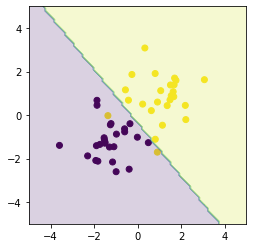

In [16]:
x_train, y_train = genera_datos()
x1_test, x2_test = np.meshgrid(np.linspace(-5, 5, 100), np.linspace(-5, 5, 100))
x_test = np.array([x1_test, x2_test]).reshape(2, -1).T

features = preprocessing.PolynomialFeatures(1)
X_train=features.fit_transform(x_train)
X_test=features.fit_transform(x_test)

"""----TU CODIGO AQUÍ---------"""
#CREA el objeto
modelo=LeastSquaresClassifier()
#ENTRENA el modelo
modelo.fit(X_train,y_train)
#PRUEBA el modelo
y=modelo.clasifica(X_test)
"""----------------------------"""

#-----Dibuja los datos---------------------------------
plt.scatter(x_train[:, 0], x_train[:, 1], c=y_train)
#-----Dibuja X_test---------------------------------
plt.contourf(x1_test, x2_test, y.reshape(100, 100), alpha=0.2)
#-----Formato de la gráfica------------------------
plt.xlim(-5, 5)
plt.ylim(-5, 5)
plt.gca().set_aspect('equal', adjustable='box')
fig.tight_layout()
plt.show()

**Veamos los vectores W resultantes**

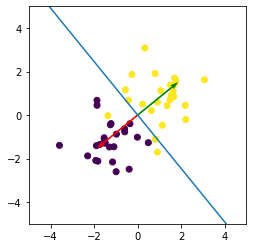

In [17]:
#--------W ----------------------
W1=modelo.W[1:,0]
W2=modelo.W[1:,1]

#-------FD-------------------------
Ax=100*W2[1]
Ay=-100*W2[0]
Bx=-100*W2[1]
By=100*W2[0]

#---------Dibuja todo-----------------
fig = plt.figure()
ax = fig.add_subplot(111)

# Los datos
plt.scatter(x_train[:, 0], x_train[:, 1], c=y_train)
#La FD
plt.plot([Ax,Bx],[Ay,By])
#Los W
plt.quiver(0,0,W1[0],W1[1], color=['r'], units='xy', scale = 0.1)
plt.quiver(0,0,W2[0],W2[1], color=['g'], units='xy', scale = 0.1)

plt.axis('equal')
plt.xlim(-5, 5)
plt.ylim(-5, 5)
plt.gca().set_aspect('equal', adjustable='box')
plt.show()

fig.tight_layout()

&#9998; **En algunos Textos, puedes encontrar que en el caso de 2 clases:**
$$
\mathbf{W}=\left(\mathbf{X}^\textrm{T}\mathbf{X}\right)^{-1}(Pos\mu^\oplus - Neg\mu^\ominus)
$$
donde $Pos$ y $Neg$ son el número de datos de la clase "positiva" y "negativa" respectivamente, y $\mu$ es el centroide correspondiente. 
**Verifícalo**

[-0.37369247 -0.29178704]


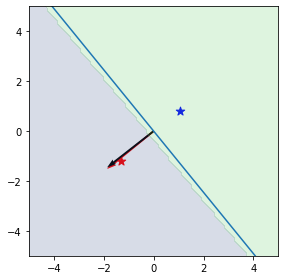

In [18]:
X=X_train[:,1:]
X_pos=X[y_train==0]
X_neg=X[y_train==1]

Pos_mu=np.mean(X_pos,axis=0)
Neg_mu=np.mean(X_neg,axis=0)

diff=len(X_pos)*Pos_mu - len(X_neg)*Neg_mu

W=np.linalg.inv(X.T@X)@diff
print(W)

fig = plt.figure()
ax = fig.add_subplot(111)
#La FD
plt.plot([Ax,Bx],[Ay,By])

# Dibuja los centroides
ax.scatter(Pos_mu[0], Pos_mu[1], c='r',marker='*',s=80)
ax.scatter(Neg_mu[0], Neg_mu[1], c='b',marker='*',s=80)

#Dibuja el "viejo" W
plt.quiver(0,0,W1[0],W1[1], color=['r'], units='xy', scale = 0.1)

#Dibuja el "nuevo" W
plt.quiver(0,0,W[0],W[1], color=['k'], units='xy', scale = .2)

plt.contourf(x1_test, x2_test, y.reshape(100, 100), alpha=0.2,levels=1)
plt.xlim(-5, 5)
plt.ylim(-5, 5)
plt.gca().set_aspect('equal', adjustable='box')
fig.tight_layout()

___

## &#9998; **TAREA**: 

### En este ejercicio nos interesa observar el efecto de los outliers y de una tercera clase en el clasificador LS.

1. Efecto de outliers
   1. Guarda el vector W del clasificador visto arriba (C1).
   2. Genera un nuevo conjunto de datos de entrenamiento con outliers usando la función `genera_datos(add_outliers=True)`; no vamos a necesitar el meshgrid.
   3. Crea un nuevo clasificador y entrénalo con los datos nuevos.
   4. Compara las FD del primer modelo y de este segundo modelo graficando ambas en la misma figura (es posible que necesites ajustar los límites de los ejes (x,y)).
2. Efecto de 3 clases
   1. Genera otro conjunto de datos de entrenamiento con 3 clases usando la función `genera_datos(add_class=True)`; usa un meshgrid de -5 a 10.
   2. Crea un nuevo clasificador y entrénalo con estos datos de 3 clases.
   3. Prueba el clasificador con datos de Test y observa las FD (es posible que necesites ajustar los límites de los ejes (x,y)).
3. Concluye sobre las características de OLS como clasificador. 

___